In [151]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from evaluate import evaluate, run_model

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.utils.multiclass import unique_labels

from sys import platform as sys_pf
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")

from matplotlib import pyplot as plt

In [76]:
!python evaluate.py

100%|█████████████████████████████████████████| 120/120 [00:15<00:00,  7.57it/s]
[0.   0.   0.   0.04 0.04 0.08 0.08 0.12 0.12 0.16 0.16 0.2  0.2  0.24
 0.24 0.28 0.28 0.32 0.32 0.36 0.36 0.44 0.44 0.52 0.52 0.6  0.6  0.68
 0.68 0.84 0.84 0.92 0.92 1.   1.  ]
[0.         0.01052632 0.41052632 0.41052632 0.42105263 0.42105263
 0.46315789 0.46315789 0.57894737 0.57894737 0.67368421 0.67368421
 0.68421053 0.68421053 0.69473684 0.69473684 0.75789474 0.75789474
 0.76842105 0.76842105 0.90526316 0.90526316 0.91578947 0.91578947
 0.93684211 0.93684211 0.94736842 0.94736842 0.95789474 0.95789474
 0.96842105 0.96842105 0.98947368 0.98947368 1.        ]
test loss: 0.5020
test AUC_abnormal: 0.8244


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(labels, preds)

In [78]:
fpr = [0.,  0.,   0.,   0.04, 0.04, 0.08, 0.08, 0.12, 0.12, 0.16, 0.16, 0.2,  0.2, 0.24, 0.24, 0.28, 0.28, 0.32, 0.32, 0.36, 0.36, 0.44, 0.44, 0.52, 0.52, 0.6,  0.6,  0.68, 0.68, 0.84, 0.84, 0.92, 0.92, 1.,   1.  ]
tpr = [0. ,        0.01052632, 0.41052632, 0.41052632, 0.42105263, 0.42105263,
 0.46315789, 0.46315789, 0.57894737, 0.57894737, 0.67368421, 0.67368421,
 0.68421053, 0.68421053, 0.69473684, 0.69473684, 0.75789474, 0.75789474,
 0.76842105, 0.76842105, 0.90526316, 0.90526316, 0.91578947, 0.91578947,
 0.93684211, 0.93684211, 0.94736842, 0.94736842, 0.95789474, 0.95789474,
 0.96842105, 0.96842105, 0.98947368, 0.98947368, 1.        ]

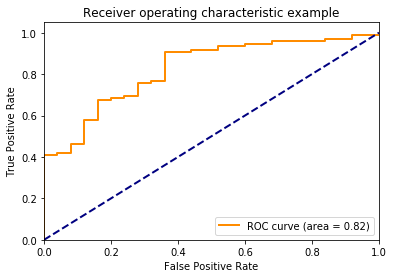

In [82]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % 0.8244)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [196]:
def plot_confusion_matrix(y_true, y_pred, classes, title,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = title

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = np.array([0,1])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix:')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center", fontsize=16,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    # plt.savefig(output_file)
    return ax

In [177]:
preds_triple = [[0.33151305, 0.02213098, 0.01899546],
 [0.33964676, 0.03957655, 0.07701965],
 [0.5604004,  0.0911556,  0.05028695],
 [0.25844544, 0.14812878, 0.03144024],
 [0.59217936, 0.0394745,  0.09335323],
 [0.6452492,  0.06321779, 0.2359394 ],
 [0.13740729, 0.02189718, 0.02165475],
 [0.97664934, 0.62941486, 0.904368  ],
 [0.935091,   0.6999608,  0.43075666],
 [0.4149725,  0.09828921, 0.08139341],
 [0.86893374, 0.33773604, 0.2889809 ],
 [0.92105913, 0.02020481, 0.50410116],
 [0.6760246,  0.0811607,  0.17463365],
 [0.73654115, 0.18118142, 0.21747509],
 [0.823545,   0.28177187, 0.16002612],
 [0.9395514,  0.068053,   0.11069974],
 [0.6141271, 0.07717526, 0.07152947],
 [0.521765,   0.10071888, 0.02004385],
 [0.8116981,  0.00924102, 0.1268268 ],
 [0.6124416,  0.25954586, 0.12314483],
 [0.61278135, 0.08256691, 0.18590628],
 [0.9751092,  0.08945301, 0.6334952 ],
 [0.31113416, 0.01541047, 0.0205222 ],
 [0.26984498, 0.05700581, 0.01989634],
 [0.7576105,  0.11077422, 0.15566151],
 [0.9891459,  0.07234037, 0.37432465],
 [0.9577943,  0.07521523, 0.07625099],
 [0.67917407, 0.02658351, 0.0564898 ],
 [0.91994804, 0.13782477, 0.14717673],
 [0.95313644, 0.10004061, 0.15094134],
 [0.9400413,  0.05588219, 0.28455055],
 [0.6949034,  0.09031749, 0.20407763],
 [0.9852657,  0.5971681, 0.3510399 ],
 [0.96703064, 0.07607277, 0.18818563],
 [0.67729896, 0.05779466, 0.05330487],
 [0.44003937, 0.08315849, 0.06332887],
 [0.9686803,  0.16992132, 0.5879316 ],
 [0.97605693, 0.13535379, 0.6350472 ],
 [0.83997023, 0.02214003, 0.23230405],
 [0.9037659,  0.02154731, 0.24503824],
 [0.9368409,  0.02618855, 0.14580679],
 [0.999108,   0.18698798, 0.5295034 ],
 [0.97812873, 0.17190954, 0.1543869 ],
 [0.95844615, 0.19991042, 0.30207142],
 [0.9814354,  0.85579336, 0.4546806 ],
 [0.90850705, 0.4866737,  0.37359437],
 [0.9877101,  0.8853992,  0.37172848],
 [0.9273776,  0.37957796, 0.22281267],
 [0.99206233, 0.25086313, 0.6900699 ],
 [0.98751765, 0.5512784,  0.3548489 ],
 [0.99520844, 0.13687778, 0.29326424],
 [0.9522826,  0.21235411, 0.38066444],
 [0.97403854, 0.75710154, 0.29946077],
 [0.9943098,  0.48278615, 0.8300228 ],
 [0.99636984, 0.42489395, 0.8350769 ],
 [0.9794693,  0.4154089, 0.2964378 ],
 [0.9774929,  0.57903373, 0.5125294 ],
 [0.99461764, 0.09633235, 0.87035584],
 [0.99672526, 0.5108303,  0.7950294 ],
 [0.9915792,  0.3602415,  0.82400775],
 [0.9629752,  0.5323003,  0.30548304],
 [0.9900428,  0.4349145,  0.58369714],
 [0.9624536,  0.5171248,  0.8554971 ],
 [0.9507273,  0.20793144, 0.5777249 ],
 [0.9982949,  0.75850713, 0.6452477 ],
 [0.99774396, 0.68383634, 0.44464162],
 [0.9995115,  0.37307978, 0.8265467 ],
 [0.9831519,  0.5309029,  0.3327078 ],
 [0.99114096, 0.8051164,  0.47680447],
 [0.9746002,  0.6898506,  0.23460102],
 [0.5637669,  0.4682283,  0.18664896],
 [0.945854,   0.68995214, 0.5329545 ],
 [0.9775553,  0.71356374, 0.6040528 ],
 [0.9996953,  0.8232684,  0.55475575],
 [0.9986878,  0.8476686,  0.61078763],
 [0.9975647,  0.40191418, 0.3537081 ],
 [0.99283946, 0.7525545,  0.40301007],
 [0.9844185,  0.8697529,  0.37100822],
 [0.9315521,  0.37367842, 0.43267393],
 [0.991987,   0.9054905,  0.63262   ],
 [0.9961055,  0.16352768, 0.5424838 ],
 [0.99964285, 0.3920553,  0.9021001 ],
 [0.72304076, 0.15400168, 0.10437658],
 [0.99791116, 0.9298439,  0.8291071 ],
 [0.99228525, 0.5999937,  0.29934043],
 [0.9870524,  0.73706704, 0.57710046],
 [0.99574006, 0.30777493, 0.68620247],
 [0.5638399,  0.03167547, 0.03533055],
 [0.9649415,  0.13077912, 0.1773129 ],
 [0.9748404,  0.22518341, 0.1559673 ],
 [0.9850869,  0.753898,   0.7243443 ],
 [0.9963574,  0.03763276, 0.8826011 ],
 [0.99131596, 0.2400235,  0.23389007],
 [0.997097,   0.12880611, 0.5691669 ],
 [0.9991435,  0.6050929,  0.7863778 ],
 [0.96808225, 0.71033144, 0.18094684],
 [0.99605346, 0.11089698, 0.6930776 ],
 [0.99661404, 0.68088764, 0.95805043],
 [0.9899795,  0.56985366, 0.92706233],
 [0.9456118,  0.15308645, 0.18157108],
 [0.9998124,  0.84701073, 0.9413121 ],
 [0.9993806,  0.36435354, 0.9076558 ],
 [0.9927134,  0.21923357, 0.57328516],
 [0.9929107,  0.07788148, 0.601713  ],
 [0.9805267,  0.28661337, 0.3452779 ],
 [0.9988446,  0.38451123, 0.5824223 ],
 [0.9914181,  0.26949236, 0.40489376],
 [0.9934047,  0.43699092, 0.28302386],
 [0.94576466, 0.12101901, 0.26865608],
 [0.98939824, 0.05212134, 0.73375547],
 [0.96903145, 0.05451264, 0.14050697],
 [0.9448109,  0.05394142, 0.29556298],
 [0.99340254, 0.49061453, 0.5890749 ],
 [0.999361,   0.17920253, 0.80180323],
 [0.99578285, 0.13809869, 0.30004403],
 [0.97858536, 0.42451566, 0.3268049 ],
 [0.98892576, 0.13881229, 0.2777154 ],
 [0.97478867, 0.03580572, 0.1404907 ],
 [0.9905021,  0.17709723, 0.4129564 ],
 [0.43958032, 0.03395558, 0.01652028]]

In [6]:
actual_triple = [[0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [0., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 0., 0.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 0., 0.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 0., 0.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 1., 1.],
 [0., 0., 0.],
 [1., 1., 0.],
 [1., 1., 0.],
 [1., 1., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 1., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 0., 1.],
 [1., 1., 1.],
 [1., 1., 1.],
 [1., 0., 1.],
 [1., 1., 1.],
 [1., 0., 1.]]

In [161]:
preds_triple_abnormal = np.where(np.array(preds_triple)[:,0] > 0.5, 1, 0)
actual_triple_abnormal = np.array(actual_triple)[:,0]

Confusion matrix:
[[ 7 18]
 [ 2 93]]


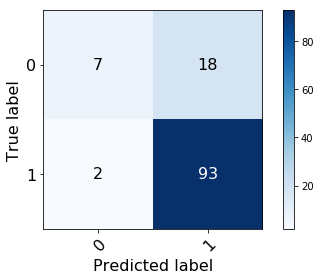

In [201]:
plot_confusion_matrix(actual_triple_abnormal, preds_triple_abnormal, classes=[0,1], title="")

In [178]:
preds_triple_acl = np.where(np.array(preds_triple)[:,1] > 0.5, 1, 0)
actual_triple_acl = np.array(actual_triple)[:,1]

Confusion matrix:
[[61  5]
 [27 27]]


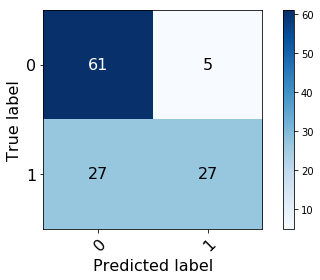

In [203]:
plot_confusion_matrix(actual_triple_acl, preds_triple_acl, classes=[0,1], title="")

In [166]:
preds_triple_meniscus = np.where(np.array(preds_triple)[:,2] > 0.5, 1, 0)
actual_triple_meniscus = np.array(actual_triple)[:,2]

Confusion matrix:
[[53 15]
 [24 28]]


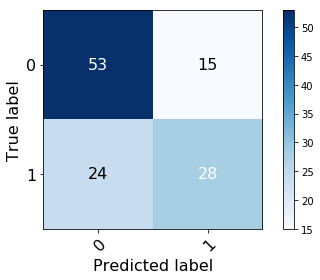

In [205]:
plot_confusion_matrix(actual_triple_meniscus, preds_triple_meniscus, classes=[0,1], title="")

In [157]:
preds_triple_abnormal = np.array(preds_triple)[:,0]
preds_triple_acl = np.array(preds_triple)[:,1]
preds_triple_meniscus = np.array(preds_triple)[:,2]

fpr_abnormal, tpr_abnormal, thresholds_abnormal = metrics.roc_curve(actual_triple_abnormal, preds_triple_abnormal)
fpr_acl, tpr_acl, thresholds_acl = metrics.roc_curve(actual_triple_acl, preds_triple_acl)
fpr_meniscus, tpr_meniscus, thresholds_meniscus = metrics.roc_curve(actual_triple_meniscus, preds_triple_meniscus)

auc_abnormal = roc_auc_score(actual_triple_abnormal, preds_triple_abnormal)
auc_acl = roc_auc_score(actual_triple_acl, preds_triple_acl)
auc_meniscus = roc_auc_score(actual_triple_meniscus, preds_triple_meniscus)

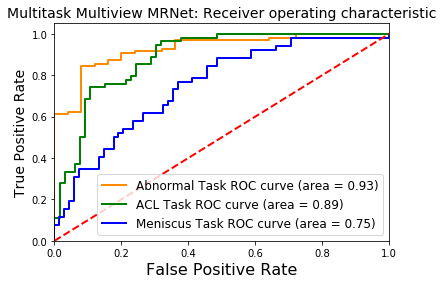

In [213]:
plt.figure()
lw = 2
plt.plot(fpr_abnormal, tpr_abnormal, color='darkorange',
         lw=lw, label='Abnormal Task ROC curve (area = %0.2f)' % auc_abnormal)
plt.plot(fpr_acl, tpr_acl, color='green',
         lw=lw, label='ACL Task ROC curve (area = %0.2f)' % auc_acl)
plt.plot(fpr_meniscus, tpr_meniscus, color='blue',
         lw=lw, label='Meniscus Task ROC curve (area = %0.2f)' % auc_meniscus)
        
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multitask Multiview MRNet: Receiver operating characteristic', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [214]:
preds_lstm_acl_men = [[0.06494281, 0.22875725],
 [0.12176446, 0.4737536 ],
 [0.16009207, 0.20807417],
 [0.06678157, 0.14098118],
 [0.09997349, 0.5641605 ],
 [0.25137693, 0.6215353 ],
 [0.14189357, 0.27458638],
 [0.5680928,  0.83215594],
 [0.31870592, 0.4958333 ],
 [0.09721815, 0.5546469 ],
 [0.20851403, 0.85659295],
 [0.12581398, 0.7201382 ],
 [0.17069097, 0.6805766 ],
 [0.11578862, 0.6219205 ],
 [0.14979504, 0.7932994 ],
 [0.1246956,  0.48595592],
 [0.12637876, 0.33861813],
 [0.48259693, 0.33239898],
 [0.07669493, 0.38987398],
 [0.13391088, 0.25550658],
 [0.06572004, 0.60066426],
 [0.14407438, 0.77658767],
 [0.04152961, 0.13888885],
 [0.21752739, 0.37621394],
 [0.11645517, 0.45492354],
 [0.09117389, 0.7526709 ],
 [0.32493898, 0.8566722 ],
 [0.06445237, 0.60650885],
 [0.10026126, 0.70511675],
 [0.26039463, 0.6334025 ],
 [0.29401544, 0.85067844],
 [0.19005623, 0.7025196 ],
 [0.69771713, 0.87043977],
 [0.4154234,  0.6944478 ],
 [0.08887555, 0.18716289],
 [0.12190405, 0.56252   ],
 [0.09944922, 0.60812837],
 [0.09907196, 0.7393297 ],
 [0.09801662, 0.4158457 ],
 [0.30201873, 0.7541603 ],
 [0.23204465, 0.6403017 ],
 [0.46634883, 0.86033547],
 [0.2267336,  0.7166239 ],
 [0.34028804, 0.80463094],
 [0.8433812,  0.88891715],
 [0.6888472,  0.9012247 ],
 [0.72448236, 0.77105004],
 [0.6736492,  0.6778339 ],
 [0.25112307, 0.90743434],
 [0.6990642,  0.7585384 ],
 [0.20268962, 0.8884569 ],
 [0.36199927, 0.85867083],
 [0.736361,   0.79542255],
 [0.20819506, 0.9095821 ],
 [0.7770025,  0.95579135],
 [0.58083105, 0.81359076],
 [0.6618721,  0.89117914],
 [0.13380204, 0.8538549 ],
 [0.7535929,  0.8902668 ],
 [0.2827571,  0.81421494],
 [0.59799,    0.8674785 ],
 [0.7647229,  0.91005445],
 [0.40318736, 0.904156  ],
 [0.66815054, 0.8859236 ],
 [0.49117127, 0.8510961 ],
 [0.24882384, 0.8662495 ],
 [0.5654487,  0.9585606 ],
 [0.6441395,  0.7122315 ],
 [0.7623687,  0.823218  ],
 [0.80363137, 0.892746  ],
 [0.7787792,  0.6414959 ],
 [0.7436629,  0.8886708 ],
 [0.63447326, 0.8051716 ],
 [0.8182569,  0.9172477 ],
 [0.7576601,  0.930984  ],
 [0.57297647, 0.92298526],
 [0.6962305,  0.9505269 ],
 [0.88563067, 0.7810664 ],
 [0.62314266, 0.7727511 ],
 [0.8161495,  0.8746731 ],
 [0.69751084, 0.8110391 ],
 [0.4964034,  0.9471644 ],
 [0.42352226, 0.66480386],
 [0.84309006, 0.92050976],
 [0.6927418,  0.94483054],
 [0.67870176, 0.8313418 ],
 [0.2455006,  0.75035566],
 [0.11847535, 0.3233945 ],
 [0.18686458, 0.53868824],
 [0.24429774, 0.6144658 ],
 [0.78262925, 0.8704792 ],
 [0.25594538, 0.91382426],
 [0.208296,   0.7890509 ],
 [0.4929808,  0.9466256 ],
 [0.67406094, 0.9610542 ],
 [0.6357522,  0.76690924],
 [0.19390124, 0.94258314],
 [0.63988936, 0.949377  ],
 [0.6390132,  0.84232104],
 [0.76154274, 0.87687814],
 [0.7239099,  0.8964539 ],
 [0.19727492, 0.9234904 ],
 [0.30984125, 0.9001401 ],
 [0.28256452, 0.8951708 ],
 [0.51172405, 0.7979672 ],
 [0.2416611,  0.9253834 ],
 [0.21623789, 0.90184784],
 [0.44468477, 0.7743706 ],
 [0.10679573, 0.67202944],
 [0.14844587, 0.86165714],
 [0.1815476,  0.5779948 ],
 [0.11212734, 0.5950462 ],
 [0.39303157, 0.88910097],
 [0.2671111,  0.9370525 ],
 [0.11342208, 0.7020024 ],
 [0.5797738,  0.8246903 ],
 [0.16405475, 0.7299245 ],
 [0.09376838, 0.80115074],
 [0.49631506, 0.7429982 ],
 [0.09688163, 0.22345452]]

In [242]:
preds_lstm_abnormal = [[0.13644959],
 [0.21391375],
 [0.38103488],
 [0.07287169],
 [0.6288975 ],
 [0.6861632 ],
 [0.23671065],
 [0.89124155],
 [0.23848988],
 [0.16755402],
 [0.83938617],
 [0.8625134 ],
 [0.5872031 ],
 [0.33856577],
 [0.84521115],
 [0.699943  ],
 [0.37617907],
 [0.38023376],
 [0.6412508 ],
 [0.22093946],
 [0.16740958],
 [0.84164834],
 [0.3034695 ],
 [0.28891233],
 [0.24085547],
 [0.9601698 ],
 [0.94965076],
 [0.35799724],
 [0.90952796],
 [0.5877284 ],
 [0.8109994 ],
 [0.6871831 ],
 [0.94610095],
 [0.93878496],
 [0.15103577],
 [0.4852353 ],
 [0.9245459 ],
 [0.70795447],
 [0.57035553],
 [0.9672619 ],
 [0.9037582 ],
 [0.9755908 ],
 [0.74397796],
 [0.9471347 ],
 [0.9711178 ],
 [0.798237  ],
 [0.96966827],
 [0.81508344],
 [0.95607316],
 [0.8304016 ],
 [0.95045096],
 [0.91919154],
 [0.8483532 ],
 [0.9508356 ],
 [0.98012483],
 [0.84576565],
 [0.9281349 ],
 [0.97386235],
 [0.9741779 ],
 [0.8657825 ],
 [0.90155524],
 [0.9691823 ],
 [0.85876036],
 [0.9371959 ],
 [0.94455636],
 [0.90544575],
 [0.9883415 ],
 [0.6979354 ],
 [0.93817025],
 [0.88946855],
 [0.31422335],
 [0.91418356],
 [0.7655535 ],
 [0.979509  ],
 [0.9937582 ],
 [0.9777353 ],
 [0.96779156],
 [0.89793265],
 [0.84689724],
 [0.97084683],
 [0.96645576],
 [0.99036413],
 [0.6872935 ],
 [0.979322  ],
 [0.98341495],
 [0.82679814],
 [0.9514193 ],
 [0.39314252],
 [0.6059439 ],
 [0.8704701 ],
 [0.93673414],
 [0.98541945],
 [0.8895481 ],
 [0.9838446 ],
 [0.9890366 ],
 [0.82973874],
 [0.9830692 ],
 [0.98534167],
 [0.87750745],
 [0.95861393],
 [0.96205515],
 [0.98701084],
 [0.93337023],
 [0.89951384],
 [0.8892793 ],
 [0.9720804 ],
 [0.8908769 ],
 [0.9063079 ],
 [0.9028748 ],
 [0.9611488 ],
 [0.8864378 ],
 [0.7596002 ],
 [0.9406869 ],
 [0.97836226],
 [0.8526699 ],
 [0.8492593 ],
 [0.89757717],
 [0.9294944 ],
 [0.85360634],
 [0.42250147]]

In [247]:
preds_lstm_abnormal = np.where(np.array(preds_lstm_abnormal) > 0.5, 1, 0)
actual_lstm_abnormal = np.array(actual_triple)[:,0]

In [248]:
preds_lstm_acl = np.where(np.array(preds_lstm_acl_men)[:,0] > 0.5, 1, 0)
actual_lstm_acl = np.array(actual_triple)[:,1]

In [249]:
preds_lstm_men = np.where(np.array(preds_lstm_acl_men)[:,1] > 0.5, 1, 0)
actual_lstm_men = np.array(actual_triple)[:,2]

In [243]:
preds_lstm_abnormal = np.array(preds_lstm_abnormal)
preds_lstm_acl = np.array(preds_lstm_acl_men)[:,0]
preds_lstm_men = np.array(preds_lstm_acl_men)[:,1] 

fpr_abnormal, tpr_abnormal, thresholds_abnormal = metrics.roc_curve(actual_lstm_abnormal, preds_lstm_abnormal)
fpr_acl, tpr_acl, thresholds_acl = metrics.roc_curve(actual_lstm_acl, preds_lstm_acl)
fpr_meniscus, tpr_meniscus, thresholds_meniscus = metrics.roc_curve(actual_lstm_men, preds_lstm_men)

auc_abnormal = roc_auc_score(actual_lstm_abnormal, preds_lstm_abnormal)
auc_acl = roc_auc_score(actual_lstm_acl, preds_lstm_acl)
auc_meniscus = roc_auc_score(actual_lstm_men, preds_lstm_men)

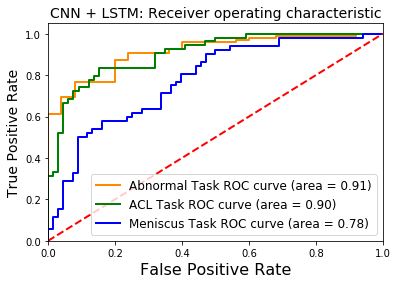

In [245]:
plt.figure()
lw = 2
plt.plot(fpr_abnormal, tpr_abnormal, color='darkorange',
         lw=lw, label='Abnormal Task ROC curve (area = %0.2f)' % auc_abnormal)
plt.plot(fpr_acl, tpr_acl, color='green',
         lw=lw, label='ACL Task ROC curve (area = %0.2f)' % auc_acl)
plt.plot(fpr_meniscus, tpr_meniscus, color='blue',
         lw=lw, label='Meniscus Task ROC curve (area = %0.2f)' % auc_meniscus)
        
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('CNN + LSTM: Receiver operating characteristic', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("ROC_CNN_LSTM")

Confusion matrix:
[[15 10]
 [ 6 89]]


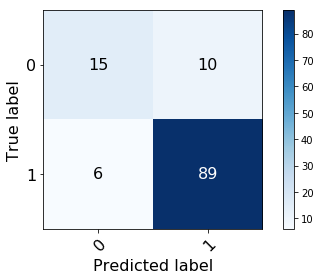

In [250]:
plot_confusion_matrix(actual_lstm_abnormal, preds_lstm_abnormal, classes=[0,1], title="")

Confusion matrix:
[[61  5]
 [17 37]]


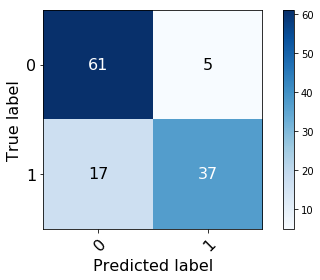

In [251]:
plot_confusion_matrix(actual_lstm_acl, preds_lstm_acl, classes=[0,1], title="")

Confusion matrix:
[[17 51]
 [ 1 51]]


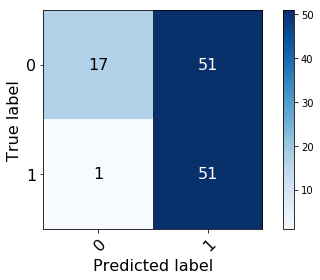

In [252]:
plot_confusion_matrix(actual_lstm_men, preds_lstm_men, classes=[0,1], title="")